# setting up 

In [116]:
import numpy as np
import topogenesis as tg
import matplotlib.pyplot as plt
import matplotlib
import random


creating grid

In [117]:
def room(width,length):
    array = np.ones((width, length), dtype=int)
    point = (width, length, 1)
    return array, point


In [118]:
def plot(_x_):

    x = np.arange(0,(32+1),2)
    y = np.arange(0,(32+1),2)


    plt.figure(figsize=(5,5))
    plt.xticks(x)
    plt.yticks(y)
    plt.plot(x, y, )
    plt.title('Our_Layout')
    plt.imshow(_x_)
    plt.colorbar()
    plt.gca().invert_yaxis()

    plt.grid(True)
    plt.rc('grid', linestyle="-", color='black')
    plt.draw()
    plt.show()



# start of script

In [119]:
##script grid
data = np.zeros((32 ,32, 1), dtype=int)


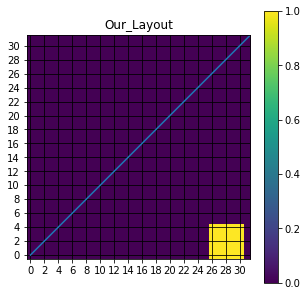

In [120]:
##script entree placement
#temporary grid array
datatemp = np.zeros((32 ,32, 1), dtype=int)

#creating the room
entree = room (5,5)
entree_array = entree[0]
entree_point = entree[1]

#setting placement area of entry hall to N/S road (not in 5 gridcells from origin)
datatemp[5::,0]=1
datatemp[0,5::]=1


#finding indexes of the road
xy_data = np.argwhere(datatemp)[:,:]
x_data = (xy_data)[:,1]
y_data = (xy_data)[:,0]

indexes_entry= []

for i in range(len(xy_data)):
    datatemp_2 = np.zeros((32 ,32, 1), dtype=int)
    datatemp_2[x_data[i]:x_data[i] + entree_point[0], y_data[i]:y_data[i] + entree_point[1]] = 1
    xcheck=np.sum(datatemp_2[0:5,0])
    ycheck=np.sum(datatemp_2[0,0:5])
    if xcheck + ycheck == 0:
        if np.sum(datatemp_2) == entree_point[0] * entree_point[1]:
            indexes_entry.append(i)
    else:
        pass

random.shuffle(indexes_entry)
index_i = 0
i = indexes_entry[index_i]
data_entry = np.zeros((32,32,1), dtype=int)
data_entry[x_data[i]:x_data[i] + entree_point[0], y_data[i]:y_data[i] + entree_point[1]] = 1

plot(data_entry)


In [121]:

##script theater placement
#creating the room
theater = room (8,16)
theater_array = theater[0]
theater_point = theater[1]

#setup lattice and stencil
lattice_1 = tg.to_lattice(data_entry, minbound=[0,0,0])
stencil_1 = tg.create_stencil("von_neumann", 1, 1)
stencil_1.function =tg.sfunc.sum

#set middle to zero
# stencil_1[1,1,1]=0
neigh = lattice_1.apply_stencil(stencil_1)

#snap locations on entry hall
xy_data_theater = np.where(neigh == 1)
x_data_theater = xy_data_theater[0]
y_data_theater = xy_data_theater[1]

# for k in xy_data_theater[0]:
#     x_data_theater.append(int(k))
# y_data_theater = []
# for k in xy_data_theater[1]:
#     y_data_theater.append(int(i))

#offset area
base_offset_2 = np.zeros((32,32,1), dtype=int)
base_offset_2[0:2,::]=1
base_offset_2[::,0:2]=1

datatemp_2 = data
indexes_theater = []
impossible = False

for j in range(len(x_data_theater)):
    datatemp_2 = np.zeros((32,32,1), dtype=int)
    datatemp_2[x_data_theater[j]:x_data_theater[j] + theater_point[0], y_data_theater[j]:y_data_theater[j] + theater_point[1]] = 1
    if np.amax(np.add(datatemp_2,data_entry))<= 1: #no overlap with entry
        if np.amax(np.add(datatemp_2,base_offset_2)) <= 1: #no overlap with offset area
            if np.sum(datatemp_2) == theater_point[0] * theater_point[1]: #not outside of canvas
                x = np.zeros((32,32,1), dtype=int)
                x[x_data_theater,y_data_theater] = 1
                x2 = np.add(x,datatemp_2)
                if (x2==2).sum() >= 2:
                    indexes_theater.append(j)
                    
    else:
        impossible = True

try:
    random.shuffle(indexes_theater)
    index_j = 0
    j = indexes_theater[index_j]
    data_theater = np.zeros((32,32,1), dtype=int)
    data_theater[x_data_theater[j]:x_data_theater[j] + theater_point[0], y_data_theater[j]:y_data_theater[j] + theater_point[1]] = 2
    data_theater = np.add(data_theater, data_entry)
    impossible = False
    plot(data_theater)

except:
    impossible = True
    print('no configuration possible with this placement of entry')

no configuration possible with this placement of entry


In [122]:
##script toilet placement
#creating the room
toilet = room (2,2)
toilet_array = toilet[0]
toilet_point = toilet[1]

#snap locations on entry hall
xy_data_toilet = np.where(neigh == 1)
x_data_toilet = xy_data_toilet[0]
y_data_toilet = xy_data_toilet[1]

indexes_toilet_1 = []

#checking placement of toilet
for k in range(len(x_data_toilet)):
    datatemp_2 = np.zeros((32,32,1), dtype=int)
    datatemp_2[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 1 #changing location to 1's 

    if np.sum(datatemp_2) == toilet_point[0] * toilet_point[1]: #check if it is on canvas
        if np.amax(np.add(datatemp_2,data_entry))<= 1: #check if intersect with entry
            if np.amax(np.add(data_theater, datatemp_2)) <= 2: #check if intersect with theater
                if np.amax(np.add(base_offset_2,datatemp_2)) <= 1: #check if it is in offset area
                    indexes_toilet_1.append(k) #add values that come through all checks to a list
    else:
        impossible = True #this boolean is used to trigger a loop function later



if impossible == False:
    random.shuffle(indexes_toilet_1)
    index_k = 0
    k = indexes_toilet_1[index_k]

    data_toilet_1 = data_theater
    data_toilet_1[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 3
    impossible = False

    plot(data_toilet_1)
    print('base')

else:
    print('could not place toilet')


could not place toilet


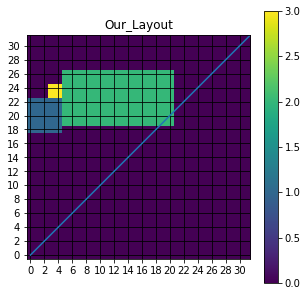

In [114]:
#self correcting loop
data_base = np.zeros((32,32,1), dtype=int)

while len(indexes_toilet_1) == 0 or len(indexes_theater) == 0:
    print('itteration', index_i)
    possible_toilet = False
    possible_theater = False
    
    index_i = index_i + 1
    i = indexes_entry[index_i]
    data_entry = np.zeros((32,32,1), dtype=int)
    data_entry[x_data[i]:x_data[i] + entree_point[0], y_data[i]:y_data[i] + entree_point[1]] = 1
    
    #create new lattice
    lattice_1 = tg.to_lattice(data_entry, minbound=[0,0,0])
    stencil_1 = tg.create_stencil("von_neumann", 1, 1)
    stencil_1.function =tg.sfunc.sum

    #set middle to zero
    # stencil_1[1,1,1]=0
    neigh = lattice_1.apply_stencil(stencil_1)

    #snap locations on entry hall
    xy_data_theater = np.where(neigh == 1)
    x_data_theater = xy_data_theater[0]
    y_data_theater = xy_data_theater[1]

    #snap locations on entry hall
    xy_data_toilet = np.where(neigh == 1)
    x_data_toilet = xy_data_toilet[0]
    y_data_toilet = xy_data_toilet[1]
    
    indexes_theater = []
    indexes_toilet_1 = []

    for j in range(len(x_data_theater)):
        datatemp_2 = np.zeros((32,32,1), dtype=int)
        datatemp_2[x_data_theater[j]:x_data_theater[j] + theater_point[0], y_data_theater[j]:y_data_theater[j] + theater_point[1]] = 1
        if np.amax(np.add(datatemp_2,data_entry))<= 1: #no overlap with entry
            if np.amax(np.add(datatemp_2,base_offset_2)) <= 1: #no overlap with offset area
                if np.sum(datatemp_2) == theater_point[0] * theater_point[1]: #check if on canvas
                    x = np.zeros((32,32,1), dtype=int)
                    x[x_data_theater,y_data_theater] = 1
                    x2 = np.add(x,datatemp_2)
                    if (x2==2).sum() >= 2:
                        indexes_theater.append(j)
                        possible_theater = True
        else:
            continue
            possible_theater = False

    for k in range(len(x_data_toilet)):
        datatemp_2 = np.zeros((32,32,1), dtype=int)
        datatemp_2[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 1
        if np.sum(datatemp_2) == toilet_point[0] * toilet_point[1]: #if it is on canvas
            if np.amax(np.add(datatemp_2,data_entry))<= 1: #intersect with entry
                if np.amax(np.add(data_theater, datatemp_2)) <= 2: #intersect with theater theater has value 2
                    if np.amax(np.add(base_offset_2,datatemp_2)) <= 1:
                        indexes_toilet_1.append(k)
                        possible_toilet = True 
        else:
            continue
            possible_toilet = False
    
    if possible_theater == True and possible_toilet == True:
        impossible = False
        break

    if len(indexes_toilet_1) != 0 and len(indexes_theater) != 0:
        break


    if len(indexes_entry) == index_i:
        print('no configuration possible')
        break

    else:
        continue



try:
    random.shuffle(indexes_theater)
    random.shuffle(indexes_toilet_1)

    index_j = 0
    index_k = 0

    j = indexes_theater[index_j]
    k = indexes_toilet_1[index_k]

    data_theater = np.zeros((32,32,1), dtype=int)
    data_theater[x_data_theater[j]:x_data_theater[j] + theater_point[0], y_data_theater[j]:y_data_theater[j] + theater_point[1]] = 2
    data_toilet_1 = np.zeros((32,32,1), dtype=int)
    data_toilet_1[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 3
    

    data_base = np.add(data_entry, data_theater)
    data_base = np.add(data_base, data_toilet_1)
    
    plot(data_base)
    print('itteration', index_i)


except:
    print('niet mogelijk')


In [115]:
##script toilet placement
#creating the room
toilet = room (2,2)
toilet_array = toilet[0]
toilet_point = toilet[1]

#snap locations on entry hall
xy_data_toilet = np.where(neigh == 1)
x_data_toilet = xy_data_toilet[0]
y_data_toilet = xy_data_toilet[1]

indexes_toilet_1 = []
# print(np.amax(data_entry))
# print(np.amax(data_theater))

for k in range(len(x_data_toilet)):
    datatemp_2 = np.zeros((32,32,1), dtype=int)
    datatemp_2[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 1
    if np.sum(datatemp_2) == toilet_point[0] * toilet_point[1]: #if it is on canvas
        if np.amax(np.add(datatemp_2,data_entry))<= 1: #intersect with entry
            if np.amax(np.add(data_theater, datatemp_2)) <= 2: #intersect with theater
                if np.amax(np.add(base_offset_2,datatemp_2)) <= 1:
                    indexes_toilet_1.append(k)
    else:
        pass



# try:
#     random.shuffle(indexes_toilet_1)
#     index_k = 0
#     k = indexes_toilet_1[index_k]
#     data_toilet_1 = data_theater
#     data_toilet_1[x_data_toilet[k]:x_data_toilet[k] + toilet_point[0], y_data_toilet[k]:y_data_toilet[k] + toilet_point[1]] = 3
#     plot(data_toilet_1)

# except:
#     print('no configuration possible with this placement')